Along the entire algorithm the following conventions are assumed:

- `pos`: `Array{Any,1}`
- `k`: `Array{Any,1}`, vector of the momenta
- `surface` : `Int`
- `m` : `Int`
- `c1` : `Int`, coefficient of the total wavefunction relative to the first eigenstate

In [57]:
using Dierckx
using LinearAlgebra
using Polynomials
using Plots
using LaTeXStrings

dt = 1
hbar = 1

┌ Info: Precompiling LaTeXStrings [b964fa9f-0449-5b57-a5c2-d3ea65f4040f]
└ @ Base loading.jl:1192


1

In [26]:
function create(pos=-5, k=10, c1=1.0+0.0im, surf=1, m=2000)
    return pos, k, c1, surf, m
end

function kinetic_energy(vel::Real, m::Real)::Float64
    return vel*vel*m/2
end

function potential_energy(pos::Real, surface::Int)::Float64
    return eigvals(Potential(pos))[surface]
end

function total_energy(pos::Real, vel::Real, surface::Int,m=2000)::Float64
    return potential_energy(pos,surface)+kinetic_energy(vel,m)
end

total_energy (generic function with 3 methods)

In [27]:
function create_particle(pos::Array{T,1}, k::Array{T,1}, c1=1.0+0.0im, surf::Int=1, m::Int=2000) where T <: Real
    return pos, k, c1, surf, m
end

create_particle (generic function with 4 methods)

In [28]:
function kinetic_energy_particle(vel::Array{T,1}, m::Real)::Float64 where T <: Real
    return sum(vel.*vel)*m/2
end

function potential_energy_particle(pos::Array{T,1}, surface::Int)::Float64 where T <: Real
    return eigvals(Potential(pos))[surface]
end

function total_energy_particle(pos::Array{T,1}, vel::Array{T,1}, surface::Int,m=2000)::Float64 where T <: Real
    return potential_energy(pos,surface)+kinetic_energy(vel,m)
end

total_energy_particle (generic function with 2 methods)

In [29]:
pos, k, c1, surf, m = create_particle([-5, 0], [10,0])

([-5, 0], [10, 0], 1.0 + 0.0im, 1, 2000)

In [30]:
kinetic_energy_particle(k/m, m)

0.025

In [189]:
function Simple_avoided_crossing_2d(pos::Array{T,1})::Array{T,2} where T <: Real
    x = pos[1]
    A, B, C, D = 0.01, 1.6, 0.005, 1.0
    V = zeros(2,2)
    if x>0
        V[1,1] = A*(1-exp(-B*x))
    else
        V[1,1] = -A*(1-exp(B*x))
    end
    V[2,2] = -V[1,1]
    V[1,2] = C*exp(-D*x^2)
    V[2,1] = V[1,2]
    println(V)
    return V
end

function Simple_avoided_crossing(pos::Real)::Array{Float64,2}
    x = pos
    A, B, C, D = 0.01, 1.6, 0.005, 1.0
    V = zeros(2,2)
    if x>0
        V[1,1] = A*(1-exp(-B*x))
    else
        V[1,1] = -A*(1-exp(B*x))
    end
    V[2,2] = -V[1,1]
    V[1,2] = C*exp(-D*x^2)
    V[2,1] = V[1,2]
    return V
end

function dV_Simple_avoided_crossing(x::Real)::Array{Real,2}
    A = 0.01
    B = 1.6
    C = 0.005
    D = 1.0
    dV = zeros(2,2)
    if x>0
        dV[1,1] = A*B*(exp(-B*x))
    else
        dV[1,1] = A*B*(exp(B*x))
    end
    dV[2,2] = -dV[1,1]
    dV[1,2] = dV[2,1] = -2x*C*D*exp(-D*x^2)
    return dV
end

function Dual_avoided_crossing(x::Real)::Array{Real,2}
    A, B, C, D = 0.1, 0.28, 0.015, 0.06
    E_0 = 0.05
    V = zeros(2,2)
    V[1,1] = 0.
    V[2,2] = -A*exp(-B*x^2)+E_0
    V[1,2] = V[2,1] = C*exp(-D*x^2)
    return V
end

function dV_Dual_avoided_crossing(x::Real)::Array{Real,2}
    A, B, C, D = 0.1, 0.28, 0.015, 0.06
    V = zeros(2,2)
    V[1,1] = 0.
    V[2,2] = A*B*2x*exp(-B*x^2)
    V[1,2] = V[2,1] = -C*D*2x*exp(-D*x^2)
    return V
end

function Extended_coupling(x::Real)::Array{Real,2}
    A, B, C = 6e-4, 0.1, 0.9
    V = zeros(2,2)
    V[1,1] = A
    V[2,2] = -A
    if x<0
        V[1,2] = B*exp(C*x)
    else
        V[1,2] = B*(2-exp(-C*x))
    end
    V[2,1] = V[1,2]
    return V
end

function dV_Extended_coupling(x::Real)::Array{Real,2}
    A, B, C = 6e-4, 0.1, 0.9
    dV = zeros(2,2)
    dV[1,1] = 0
    dV[2,2] = 0
    if x<0
        dV[1,2] = B*C*exp(C*x)
    else
        dV[1,2] = B*C*exp(-C*x)
    end
    dV[2,1] = dV[1,2]
    return dV
end

dV_Extended_coupling (generic function with 1 method)

In [190]:
mutable struct Particle
    pos::Array{Float64,1}
    k::Array{Float64,1}
    c1::Number
    c2::Number
    surface::Int
    m::Int
end

In [191]:
p = Particle([-5,0], [-5,0], 1.0, 0.0, 1, 2000)

Particle([-5.0, 0.0], [-5.0, 0.0], 1.0, 0.0, 1, 2000)

In [192]:
function kinetic_energy(p::Particle)
    return sum(p.k.*p.k)/2/p.m
end

function potential_energy(p::Particle)
    return eigvals(Potential(p.pos[1]))[p.surface]
end

function total_energy(p::Particle)
    return potential_energy(p)+kinetic_energy(p)
end

total_energy (generic function with 3 methods)

In [35]:
println(kinetic_energy(p))
println(potential_energy(p))
println(total_energy(p))

0.00625


UndefVarError: UndefVarError: Potential not defined

In [193]:
function update_density_coefficients(p::Particle, dt=1)
    # for the evolution of the coefficients we work in the adiabatic representation
    # an explicit Euler method is used
    V = Potential(p.pos)
    vel = p.k/p.m
    # we evaluate first the derivatives
    der_c1 = p.c1*(-1im*eigvals(V)[1]/hbar)
    der_c1 += p.c2*(-nac(p.pos,1,2)*vel)
    der_c2 = p.c1*(-nac(p.pos,2,1)*vel)
    der_c2 += p.c2*(-1im*eigvals(V)[2]/hbar)
    p.c1 += dt*der_c1
    p.c2 += dt*der_c2
end

update_density_coefficients (generic function with 2 methods)

In [194]:
update_density_coefficients(p)

UndefVarError: UndefVarError: Potential not defined

In [195]:
function nac(pos::Float64, a::Float64, dist, i::Int, j::Int)
    nac = 0;
    e_vecs = eigvecs(Potential(pos,a,dist))
    dx = 0.0000001;
    e_vecs_1 = eigvecs(Potential(pos-dx,a,dist))
    e_vecs_2 = eigvecs(Potential(pos+dx,a,dist))
    t1 = sum(conj((e_vecs[:,i]).*e_vecs_1[:,j]))
    t2 = sum(conj((e_vecs[:,i]).*e_vecs_2[:,j]))
    d_ij = (t2-t1)/(2dx)
    nac = abs(d_ij)
    return nac[1]
end

nac (generic function with 1 method)

In [200]:
start = -10
stop = 10
l = 100000
x = range(start,stop=stop,length=l)
dx = (stop-start)/l

0.0002

In [224]:
function create_nac(Pot, der_Pot, x, size::Int=2, delta_x=0.001)
    R = [0 -1; 1 0]
    # create the empty variables
    E = zeros(length(x),size)
    ev1 = zeros(length(x),size)
    ev2 = zeros(length(x),size)
    ev1_b = zeros(length(x),size)
    ev1_a = zeros(length(x),size)
    ev2_b = zeros(length(x),size)
    ev2_a = zeros(length(x),size)
    nac_12 = zeros(length(x))
    nac_11 = zeros(length(x))
    nac_22 = zeros(length(x))
    for i in 1:length(x)
        # y[i] = nac(x[i],1,2)[1]
        E[i,:] = eigvals(Pot(x[i]))[:]
        ev1[i,:] = eigvecs(Pot(x[i]))[1,:]
        ev2[i,:] = eigvecs(Pot(x[i]))[2,:]
        ev1_b[i,:] = eigvecs(Pot(x[i]-delta_x))[1,:]
        ev2_b[i,:] = eigvecs(Pot(x[i]-delta_x))[2,:]
        ev1_a[i,:] = eigvecs(Pot(x[i]+delta_x))[1,:]
        ev2_a[i,:] = eigvecs(Pot(x[i]+delta_x))[2,:]
        if i ==1 # line 23
            nac_12[i] = -conj(ev1[i,:])'*der_Pot(x[i])*ev2[i,:]/(E[i,2]-E[i,1])
            if nac_12[i] < 0
                ev1[i,:] *= -1
            end 
            continue
        end 
        if abs(1-sum(ev1[i,:].*ev1[i-1,:]))>0.2
            ev1[i,:] *= -1
        end
        if abs(1-sum(ev2function create_nac(Pot, der_Pot, x, size::Int=2, delta_x=0.001)
    R = [0 -1; 1 0]
    # create the empty variables
    E = zeros(length(x),size)
    ev1 = zeros(length(x),size)
    ev2 = zeros(length(x),size)
    ev1_b = zeros(length(x),size)
    ev1_a = zeros(length(x),size)
    ev2_b = zeros(length(x),size)
    ev2_a = zeros(length(x),size)
    nac_12 = zeros(length(x))
    nac_11 = zeros(length(x))
    nac_22 = zeros(length(x))
    for i in 1:length(x)
        # y[i] = nac(x[i],1,2)[1]
        E[i,:] = eigvals(Pot(x[i]))[:]
        ev1[i,:] = eigvecs(Pot(x[i]))[1,:]
        ev2[i,:] = eigvecs(Pot(x[i]))[2,:]
        ev1_b[i,:] = eigvecs(Pot(x[i]-delta_x))[1,:]
        ev2_b[i,:] = eigvecs(Pot(x[i]-delta_x))[2,:]
        ev1_a[i,:] = eigvecs(Pot(x[i]+delta_x))[1,:]
        ev2_a[i,:] = eigvecs(Pot(x[i]+delta_x))[2,:]
        if i ==1 # line 23
            nac_12[i] = -conj(ev1[i,:])'*der_Pot(x[i])*ev2[i,:]/(E[i,2]-E[i,1])
            if nac_12[i] < 0
                ev1[i,:] *= -1
            end 
            continue
        end 
        if abs(1-sum(ev1[i,:].*ev1[i-1,:]))>0.2
            ev1[i,:] *= -1
        end
        if abs(1-sum(ev2[i,:].*ev2[i-1,:]))>0.2
            ev2[i,:] *= -1
        end
        if abs(1-sum(ev1_a[i,:].*ev1_a[i-1,:]))>0.2
            ev1_a[i,:] *= -1
        end
        if abs(1-sum(ev2_a[i,:].*ev2_a[i-1,:]))>0.2
            ev2_a[i,:] *= -1
        end
        if abs(1-sum(ev1_b[i,:].*ev1_b[i-1,:]))>0.2
            ev1_b[i,:] *= -1
        end
        if abs(1-sum(ev2_b[i,:].*ev2_b[i-1,:]))>0.2
            ev2_b[i,:] *= -1
        end
        nac_12[i] = -conj(ev1[i,:])'*der_Pot(x[i])*ev2[i,:]/(E[i,2]-E[i,1])
        t_11_a = sum(conj(ev1[i,:])'.*ev1_a[i,:])
        t_11_b = sum(conj(ev1[i,:])'.*ev1_b[i,:])
        nac_11[i] = (t_11_a-t_11_b)/2delta_x
        t_22_a = sum(conj(ev2[i,:])'.*ev2_a[i,:])
        t_22_b = sum(conj(ev2[i,:])'.*ev2_b[i,:])
        nac_22[i] = (t_22_a-t_22_b)/2delta_x
    end
    return nac_12, nac_11, nac_22, E
end[i,:].*ev2[i-1,:]))>0.2
            ev2[i,:] *= -1
        end
        if abs(1-sum(ev1_a[i,:].*ev1_a[i-1,:]))>0.2
            ev1_a[i,:] *= -1
        end
        if abs(1-sum(ev2_a[i,:].*ev2_a[i-1,:]))>0.2
            ev2_a[i,:] *= -1
        end
        if abs(1-sum(ev1_b[i,:].*ev1_b[i-1,:]))>0.2
            ev1_b[i,:] *= -1
        end
        if abs(1-sum(ev2_b[i,:].*ev2_b[i-1,:]))>0.2
            ev2_b[i,:] *= -1
        end
        nac_12[i] = -conj(ev1[i,:])'*der_Pot(x[i])*ev2[i,:]/(E[i,2]-E[i,1])
        t_11_a = sum(conj(ev1[i,:])'.*ev1_a[i,:])
        t_11_b = sum(conj(ev1[i,:])'.*ev1_b[i,:])
        nac_11[i] = (t_11_a-t_11_b)/2delta_x
        t_22_a = sum(conj(ev2[i,:])'.*ev2_a[i,:])
        t_22_b = sum(conj(ev2[i,:])'.*ev2_b[i,:])
        nac_22[i] = (t_22_a-t_22_b)/2delta_x
    end
    return nac_12, nac_11, nac_22, E
end

create_nac (generic function with 3 methods)

In [227]:
# test_nac(Simple_avoided_crossing,[1,2,3,4,5,56,6,54,3,2,3])
# ev1, ev2 = create_nac(Simple_avoided_crossing,x)

# typeof(Simple_avoided_crossing)
#d_12, d_11, d_22, E = create_nac(Simple_avoided_crossing,dV_Simple_avoided_crossing,x)
d_12, d_11, d_22, E = create_nac(Dual_avoided_crossing,dV_Dual_avoided_crossing,x)
#d_12, d_11, d_22, E = create_nac(Extended_coupling,dV_Extended_coupling,x)
d_12_interp = Spline1D(x, d_12) 
d_11_interp = Spline1D(x, d_11) 
d_22_interp = Spline1D(x, d_22) 
E1 = Spline1D(x, E[:,1])
E2 = Spline1D(x, E[:,2])

Spline1D(knots=[-10.0,-9.9996 … 9.9996,10.0] (99998 elements), k=3, extrapolation="nearest", residual=0.0)

In [215]:
gr()
#plot(x,d_12,ylim=[-1,1])

p = plot(x,d_12_interp.(x),
    title="Non adiabatic coupling term", 
    label=L"NAC_{12}",
    xlabel=L"x",
    ylabel="Strength")
plot!(x,E1.(x))
plot!(x,E2.(x))
plot!(x,real(d_11_interp.(x)))
plot!(x,real(d_22_interp.(x)))

# savefig("/home/erik/Desktop/GitLab_projects/tully_fssh_algorithm/Julia/NAC_1.png")

In [228]:
using JLD2
@save "Dual_avoided_crossing.jld" d_12_interp d_11_interp d_22_interp E1 E2

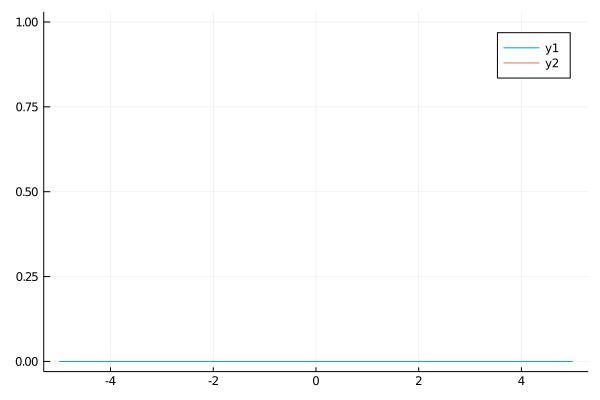

In [114]:
plot(x,imag(d_11_interp.(x)))
plot!(x,real(d_11_interp.(x)))

In [116]:
d_11_interp(2)

NaN

In [177]:
function create_nac_m(Pot, der_Pot, x, size::Int=2, delta_x=0.001)
    R = [0 -1; 1 0]
    # create the empty variables
    E = zeros(length(x),size)
    ev1 = zeros(length(x),size)
    ev2 = zeros(length(x),size)
    ev1_b = zeros(length(x),size)
    ev1_a = zeros(length(x),size)
    ev2_b = zeros(length(x),size)
    ev2_a = zeros(length(x),size)
    nac_12 = zeros(length(x))
    nac_11 = zeros(length(x))
    nac_22 = zeros(length(x))
    for i in 1:length(x)
        # y[i] = nac(x[i],1,2)[1]
        E[i,:] = eigvals(Pot(x[i]))[:]
        ev1[i,:] = eigvecs(Pot(x[i]))[1,:]
        ev2[i,:] = eigvecs(Pot(x[i]))[2,:]
        if i ==1 
            nac_12[i] = -conj(ev1[i,:])'*der_Pot(x[i])*ev2[i,:]/(E[i,2]-E[i,1])
            if nac_12[i] < 0
                ev1[i,:] *= -1
            end 
            continue
        end 
        # check if rotation is needed
        if abs(sum(ev1[i,:].*ev1[i-1,:]))<0.1
            ev1[i,:] = R*ev1[i,:]
        end
        if abs(sum(ev2[i,:].*ev2[i-1,:]))<0.1
            ev2[i,:] = R*ev2[i,:]
        end
        if abs(sum(ev1_a[i,:].*ev1_a[i-1,:]))<0.1
            ev1_a[i,:] = R*ev1_a[i,: ]
        end
        if abs(sum(ev1_b[i,:].*ev1_b[i-1,:]))<0.1
            ev1_b[i,:] = R*ev1_b[i,: ]
        end
        if abs(sum(ev2_a[i,:].*ev2_a[i-1,:]))<0.1
            ev2_a[i,:] = R*ev2_a[i,:]
        end
        if abs(sum(ev2_b[i,:].*ev2_b[i-1,:]))<0.1
            ev2_b[i,:] = R*ev2_b[i,: ]
        end
        # check if sign flip is needed
        if abs(1-sum(ev1[i,:].*ev1[i-1,:]))>0.2
            ev1[i,:] *= -1
        end
        if abs(1-sum(ev2[i,:].*ev2[i-1,:]))>0.2
            ev2[i,:] *= -1
        end
        if abs(1-sum(ev1_a[i,:].*ev1_a[i-1,:]))>0.2
            ev1_a[i,:] *= -1
        end
        if abs(1-sum(ev2_a[i,:].*ev2_a[i-1,:]))>0.2
            ev2_a[i,:] *= -1
        end
        if abs(1-sum(ev1_b[i,:].*ev1_b[i-1,:]))>0.2
            ev1_b[i,:] *= -1
        end
        if abs(1-sum(ev2_b[i,:].*ev2_b[i-1,:]))>0.2
            ev2_b[i,:] *= -1
        end
        nac_12[i] = -conj(ev1[i,:])'*der_Pot(x[i])*ev2[i,:]/(E[i,2]-E[i,1])
        #t_11_a = sum(conj(ev1[i,:])'.ev1[i,:])
        #nac_11[i] = -ev1[i,:]'*der_Pot(x[i])*ev1[i,:]/(E[i,1]-E[i,1])
        #nac_22[i] = -ev2[i,:]'*der_Pot(x[i])*ev2[i,:]/(E[i,2]-E[i,2])
        println("ev1= ",ev1[i,:])
        println("ev2= ",ev2[i,:])
    end
    return nac_12, nac_11, nac_22, E
end

create_nac_m (generic function with 3 methods)

In [186]:
start = -0.9
stop = -0.6
l = 4
x = range(start,stop=stop,length=l)
dx = (stop-start)/l

0.07500000000000001

In [187]:
nac_12, nac_11, nac_22, E = create_nac_m(Simple_avoided_crossing, dV_Simple_Avoided_Crossing, x)

ev1= [0.984715, -0.174174]
ev2= [0.174174, 0.984715]
ev1= [0.977325, -0.211746]
ev2= [0.211746, 0.977325]
ev1= [0.967093, -0.254421]
ev2= [0.254421, 0.967093]


([-0.175063, 0.158499, 0.117766, 0.0443936], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [-0.00794829 0.00794829; -0.00768596 0.00768596; -0.00740086 0.00740086; -0.00708879 0.00708879])

In [188]:
plot(x, nac_12)